In [1]:
import numpy as np
import torch
import pandas as pd
import os
import pickle
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import npm_nnf.utils.utils_kernels as KT 
import npm_nnf.density_estimation.utils_density as utils
import npm_nnf.density_estimation.utils_data_generator as generators

In [2]:
def find_last_version(path = 'models/our_model_1D',extension='pickle'):
    version = 0
    while os.path.isfile(f'{path}_{version+1}.{extension}'):
        version +=1
    return version

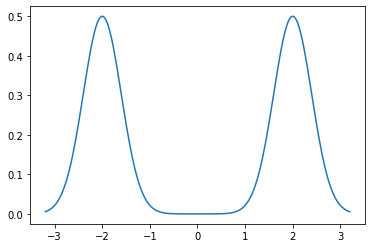

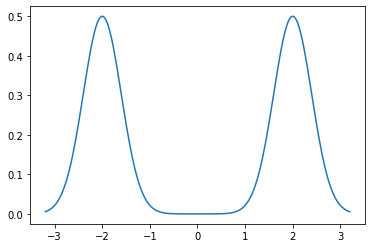

In [3]:
# Number of data points we will be using and basic parameters of the model



d = 10
#def gen(n = ndata):
#    ds,_ = generators.generateGaussianD(torch.zeros(d),1/np.sqrt(d),n,d)
#    return ds

r_data = 2
sigma_data = np.sqrt(1/(2*np.pi))
def gen(ndata):
    ds,_ = generators.generate2GaussianD(r_data,sigma_data,ndata,d)
    return ds

_,density_data=generators.generate2GaussianD(r_data,sigma_data,1,d)


base = 'gaussian'
mu_base,eta_base = torch.zeros((d,)),5

ndata = 1000
data_set = gen(ndata)

def gentest(ntest,ctest,radtest,frac = 0.5):
    ds = torch.zeros((ntest,d))
    ntestrand = int(frac*ntest)
    ntestnear = ntest - ntestrand
    ds[:ntestrand,:] = ctest + radtest*(2*torch.rand(ntestrand,d) - 1)
    ds[ntestrand:,:],_ = generators.generate2GaussianD(r_data,sigma_data,ntestnear,d)
    return ds




    
    

# Linear model

In [4]:
version = find_last_version(path = 'models/lin_model_10D',extension = 'pickle')

print(f'last model version number : {version}')

last model version number : 1


In [5]:
parameters = {'sigma' : np.logspace(-1,0,10), 'la' : np.logspace(-20,-10,5),'Niter' : ['auto'], 'mu_base' : [mu_base], 'eta_base': [eta_base]}
X = data_set
model = utils.LinearEstimator()
clf = GridSearchCV(model, parameters)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/lin_model_10D_{version}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

sigma = 0.1, lambda = 1e-20
sigma = 0.1, lambda = 1e-20
sigma = 0.1, lambda = 1e-20
sigma = 0.1, lambda = 1e-20
sigma = 0.1, lambda = 1e-20
sigma = 0.1291549665014884, lambda = 1e-20
sigma = 0.1291549665014884, lambda = 1e-20
sigma = 0.1291549665014884, lambda = 1e-20
sigma = 0.1291549665014884, lambda = 1e-20
sigma = 0.1291549665014884, lambda = 1e-20
sigma = 0.16681005372000587, lambda = 1e-20
sigma = 0.16681005372000587, lambda = 1e-20
sigma = 0.16681005372000587, lambda = 1e-20
sigma = 0.16681005372000587, lambda = 1e-20
sigma = 0.16681005372000587, lambda = 1e-20
sigma = 0.21544346900318834, lambda = 1e-20
sigma = 0.21544346900318834, lambda = 1e-20


/opt/miniconda3/envs/p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 529, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/density_estimation/utils_density.py", line 465, in fit
    al = self.dModel.prox_method(self.Niter, cb=cb, cobj=cobj)
  File "/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/density_estimation/utils_density.py", line 952, in prox_method
    Oval,Ograd,Gl_dual = Oms_dual(al2)
  File "/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/density_estimation/utils_density.py", line 929, in Oms_dual
    x = minus_l(self.lmodel.Rt(alpha))
  File "/Users/ulyssemarteau/Desktop/N

sigma = 0.21544346900318834, lambda = 1e-20
sigma = 0.21544346900318834, lambda = 1e-20
sigma = 0.21544346900318834, lambda = 1e-20
sigma = 0.2782559402207124, lambda = 1e-20
sigma = 0.2782559402207124, lambda = 1e-20
sigma = 0.2782559402207124, lambda = 1e-20
sigma = 0.2782559402207124, lambda = 1e-20
sigma = 0.2782559402207124, lambda = 1e-20
sigma = 0.35938136638046275, lambda = 1e-20
sigma = 0.35938136638046275, lambda = 1e-20
sigma = 0.35938136638046275, lambda = 1e-20
sigma = 0.35938136638046275, lambda = 1e-20
sigma = 0.35938136638046275, lambda = 1e-20
sigma = 0.46415888336127786, lambda = 1e-20
sigma = 0.46415888336127786, lambda = 1e-20
sigma = 0.46415888336127786, lambda = 1e-20
sigma = 0.46415888336127786, lambda = 1e-20
sigma = 0.46415888336127786, lambda = 1e-20
sigma = 0.5994842503189409, lambda = 1e-20
sigma = 0.5994842503189409, lambda = 1e-20
sigma = 0.5994842503189409, lambda = 1e-20
sigma = 0.5994842503189409, lambda = 1e-20
sigma = 0.5994842503189409, lambda = 1e-2

AttributeError: 'LMK2' object has no attribute 'constraint'

In [ ]:
version = 1
filename = f'models/lin_model_10D_{version}_{ndata}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model = utils.LinearEstimator(**params_best)
model.fit(data_set)

In [ ]:
#xtest = torch.linspace(-,5,3000)
c,rad,ntest = 0,6,1000

xtest2 = gentest(ntest,c,rad)
xtest = torch.zeros((ntest//2,d))


xtest[:,0] = c + rad*(2*torch.rand(ntest//2) - 1)
ytest = model.predict(xtest)
ytest2 = model.predict(xtest2)
print((ytest < 0).sum())
print(ytest.sum()*(2*rad)**d/ntest)
ydata_set = model.predict(data_set)



xdata = data_set


xhaha = torch.linspace(-rad,rad,200)
yhaha = 0.5*(torch.exp(-(xhaha-r_data)**2/(2*sigma_data**2)) +torch.exp(-(xhaha+r_data)**2/(2*sigma_data**2)) )




#xtest = torch.load(pt_path+'xtest_linear0.pt')
#ytest = torch.load(pt_path+'ytest_linear0.pt')
#xdata = torch.load(pt_path+'xdataExperiments.pt')
#ydata_set = torch.load(pt_path+'ydata_linear0.pt')


#ytestref = density_fun(xtest)



fig = plt.figure()
plt.scatter(xtest[:,0],ytest[:],lw = 1.5,label='learned projection',zorder = -1,marker = '+',color = 'b')
plt.scatter(xtest2[:,0],ytest2[:],lw = 1.5,zorder = -1,marker = '+',color = 'b')
plt.plot(xhaha,yhaha,lw = 3,linestyle = 'dashed',label = 'ground truth',color = 'orange')
#plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
#plt.scatter(xdata,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.ylim(-0.1,0.1)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=100)
plt.show()

# Our model

In [6]:
version = find_last_version(path = 'models/our_model_10D',extension = 'pickle')

print(f'last version number : {version}')

last version number : 0


sigma = 0.29999999999999993, lambda = 1e-05
Integral tracker values : 99,0


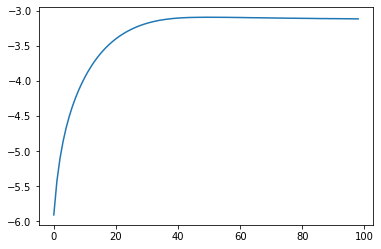

integral = 0.2433232099032927
sigma = 0.29999999999999993, lambda = 1e-05
Integral tracker values : 99,0


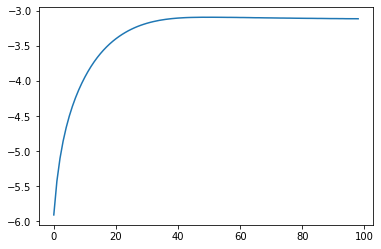

integral = 0.7073723146534189
sigma = 0.29999999999999993, lambda = 1e-05
Integral tracker values : 99,0


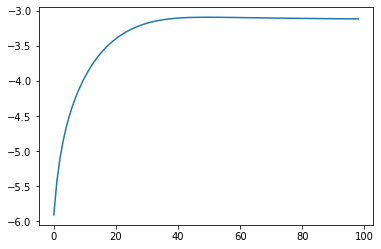

integral = 0.19029737020475213
sigma = 0.29999999999999993, lambda = 1e-05
Integral tracker values : 99,0


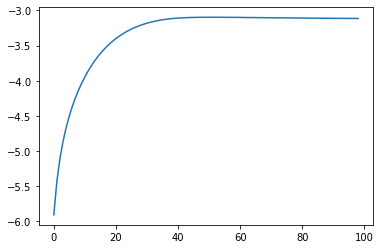

integral = 0.45826757842763627
sigma = 0.29999999999999993, lambda = 1e-05
Integral tracker values : 99,0


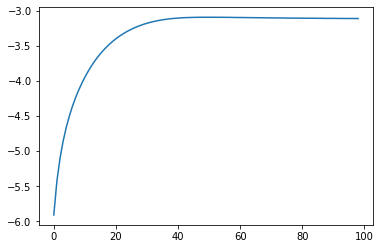

integral = 0.23639002906585327
sigma = 0.29999999999999993, lambda = 1e-05
Integral tracker values : 99,0


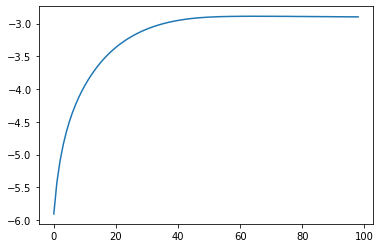

/opt/miniconda3/envs/p36/lib/python3.6/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


In [11]:
parameters = {'sigma' : np.logspace(np.log(0.3)/np.log(10),np.log(0.7)/np.log(10),1), 'la' : np.logspace(-5,0,1),'mu' : np.logspace(-5,0,1),'Niter' : [100],'mu_base' : [mu_base],'eta_base' : [eta_base]}
X = data_set
model = utils.QuadraticEstimator()
clf = GridSearchCV(model, parameters,cv = 5)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/our_model_10D_{version}_{ndata}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

In [4]:
version = 1
filename = f'models/our_model_10D_{version}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model = utils.QuadraticEstimator(**params_best)


FileNotFoundError: [Errno 2] No such file or directory: 'models/our_model_10D_1.pickle'

sigma = 0.4, lambda = 0.0001
Integral tracker values : 999,0


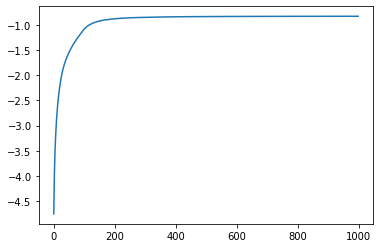

In [8]:
model = utils.QuadraticEstimator(**{'sigma' : 0.4, 'la' : 1e-4,'Niter' : 1000,'eta_base' : eta_base,'mu_base' : mu_base})
model.fit(data_set)

In [9]:
model.score(data_set)

integral = 0.585801803405267


tensor(-2.4500)

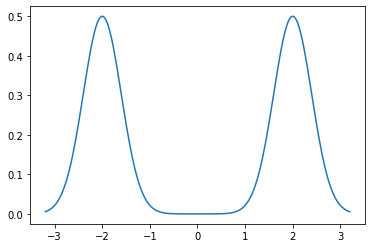

integral = 0.5853805826457098
integral = 0.5860072650495342
tensor(0)
tensor(3.5708e+10)
integral = 0.5861308677346954


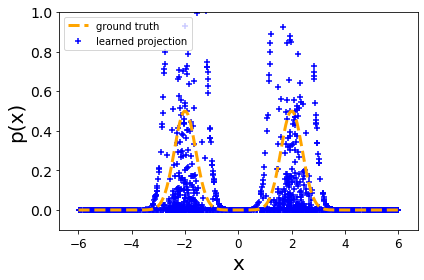

In [10]:
#xtest = torch.linspace(-,5,3000)
c,rad,ntest = 0,6,1000

xtest2 = gentest(ntest,c,rad)
xtest = torch.zeros((ntest//2,d))


xtest[:,0] = c + rad*(2*torch.rand(ntest//2) - 1)
ytest = model.predict(xtest)
ytest2 = model.predict(xtest2)
print((ytest < 0).sum())
print(ytest.sum()*(2*rad)**d/ntest)
ydata_set = model.predict(data_set)



xdata = data_set


xhaha = torch.linspace(-rad,rad,200)
yhaha = 0.5*(torch.exp(-(xhaha-r_data)**2/(2*sigma_data**2)) +torch.exp(-(xhaha+r_data)**2/(2*sigma_data**2)) )




#xtest = torch.load(pt_path+'xtest_linear0.pt')
#ytest = torch.load(pt_path+'ytest_linear0.pt')
#xdata = torch.load(pt_path+'xdataExperiments.pt')
#ydata_set = torch.load(pt_path+'ydata_linear0.pt')


#ytestref = density_fun(xtest)



fig = plt.figure()
plt.scatter(xtest[:,0],ytest[:],lw = 1.5,label='learned projection',zorder = -1,marker = '+',color = 'b')
plt.scatter(xtest2[:,0],ytest2[:],lw = 1.5,zorder = -1,marker = '+',color = 'b')
plt.plot(xhaha,yhaha,lw = 3,linestyle = 'dashed',label = 'ground truth',color = 'orange')
#plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
#plt.scatter(xdata,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.ylim(-0.1,1)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=100)
plt.show()

# Nadaraya Watson

In [4]:
version = find_last_version(path = 'models/nw_model_10D',extension = 'pickle')

print(f'last version number : {version}')

last version number : 1


sigma = 0.1, lambda = 1e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 466 iterations


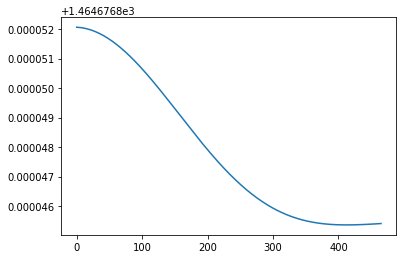

integral = tensor([[1.0000]])
sigma = 0.1, lambda = 1e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 31 iterations


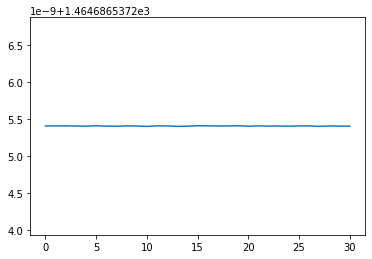

integral = tensor([[1.0000]])
sigma = 0.1291549665014884, lambda = 1e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 464 iterations


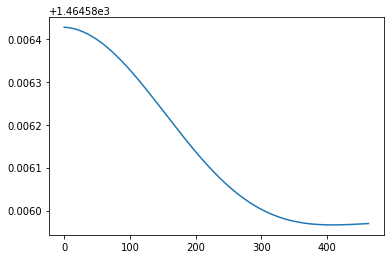

integral = tensor([[1.0000]])
sigma = 0.1291549665014884, lambda = 1e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 468 iterations


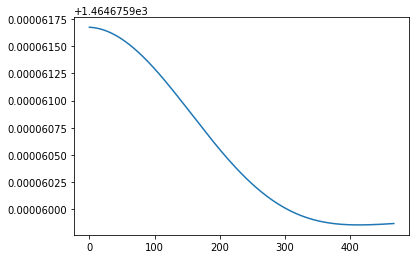

integral = tensor([[1.0000]])
sigma = 0.16681005372000587, lambda = 1e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 455 iterations


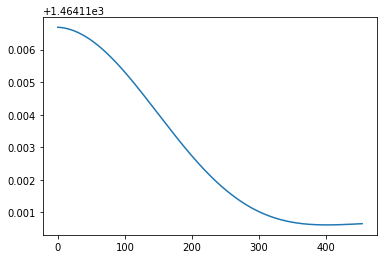

integral = tensor([[1.0000]])
sigma = 0.16681005372000587, lambda = 1e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 465 iterations


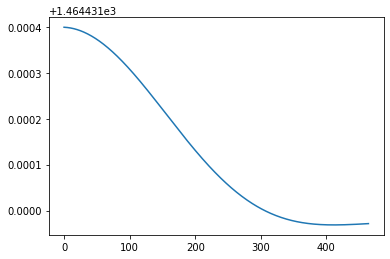

integral = tensor([[1.0000]])
sigma = 0.21544346900318834, lambda = 1e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 470 iterations


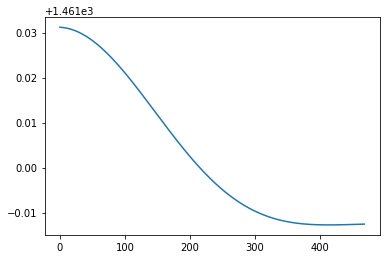

integral = tensor([[1.0000]])
sigma = 0.21544346900318834, lambda = 1e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 466 iterations


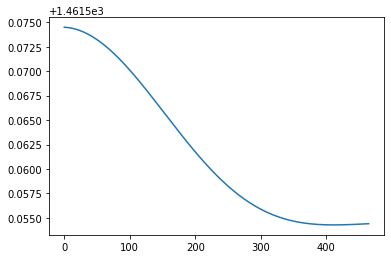

integral = tensor([[1.0000]])
sigma = 0.2782559402207124, lambda = 1e-15
 norm of the constraint : 5.6116775996327314e-12
Finished after 1690 iterations


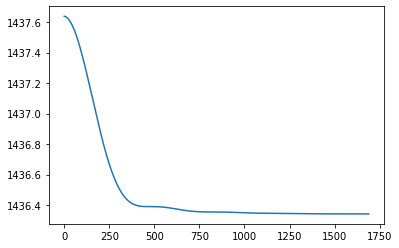

integral = tensor([[1.0000]])
sigma = 0.2782559402207124, lambda = 1e-15
 norm of the constraint : 5.621070907754123e-12
Finished after 880 iterations


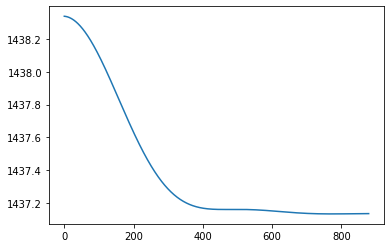

integral = tensor([[1.0000]])
sigma = 0.35938136638046275, lambda = 1e-15
 norm of the constraint : 7.17509895984332e-11
Finished after 3760 iterations


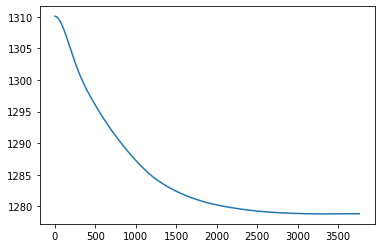

integral = tensor([[1.0000]])
sigma = 0.35938136638046275, lambda = 1e-15
 norm of the constraint : 7.187082912590732e-11
Finished after 6055 iterations


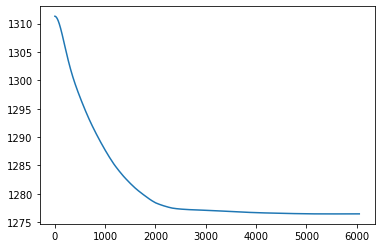

integral = tensor([[1.0000]])
sigma = 0.46415888336127786, lambda = 1e-15
 norm of the constraint : 9.112952035867178e-10
Finished after 5555 iterations


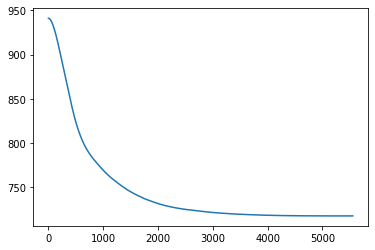

integral = tensor([[1.0000]])
sigma = 0.46415888336127786, lambda = 1e-15
 norm of the constraint : 9.128117128901206e-10
Finished after 7660 iterations


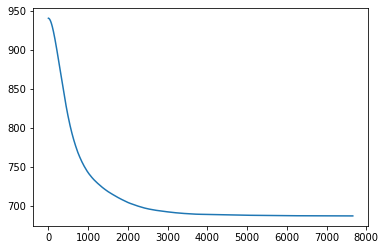

integral = tensor([[1.0000]])
sigma = 0.5994842503189409, lambda = 1e-15
 norm of the constraint : 1.1446707922222092e-08
Finished after 7760 iterations


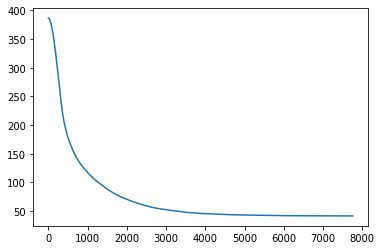

integral = tensor([[1.0000]])
sigma = 0.5994842503189409, lambda = 1e-15
 norm of the constraint : 1.1465641530237738e-08
Finished after 12685 iterations


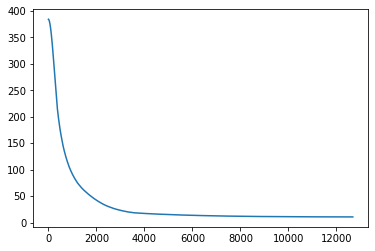

integral = tensor([[1.]])
sigma = 0.774263682681127, lambda = 1e-15
 norm of the constraint : 1.4118014899888868e-07
Finished after 11605 iterations


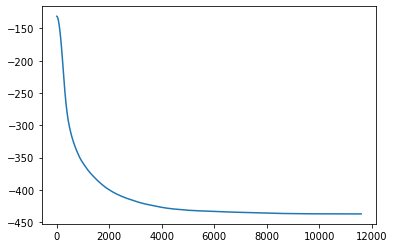

integral = tensor([[1.0000]])
sigma = 0.774263682681127, lambda = 1e-15
 norm of the constraint : 1.414113389207297e-07
Finished after 15045 iterations


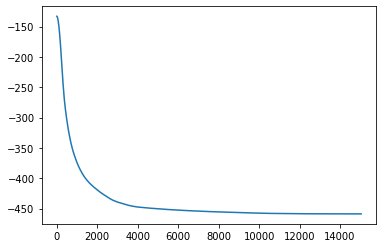

integral = tensor([[1.0000]])
sigma = 1.0, lambda = 1e-15
 norm of the constraint : 1.6900433121953011e-06
Finished after 13365 iterations


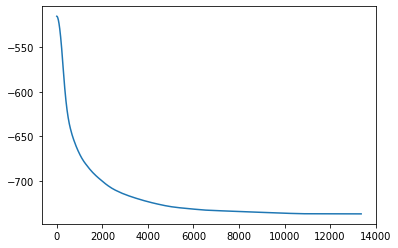

integral = tensor([[1.0000]])
sigma = 1.0, lambda = 1e-15
 norm of the constraint : 1.6927655088745877e-06
Finished after 20145 iterations


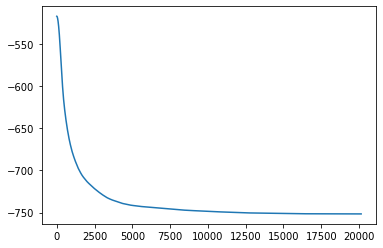

integral = tensor([[1.0000]])
sigma = 0.1, lambda = 3.359818286283788e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 466 iterations


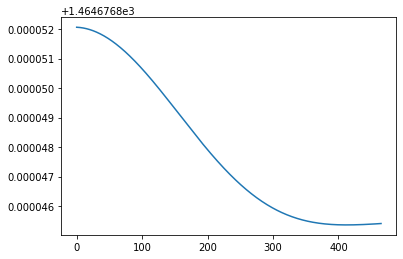

integral = tensor([[1.0000]])
sigma = 0.1, lambda = 3.359818286283788e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 32 iterations


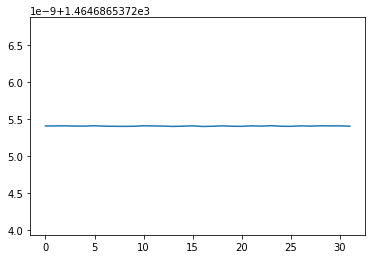

integral = tensor([[1.0000]])
sigma = 0.1291549665014884, lambda = 3.359818286283788e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 465 iterations


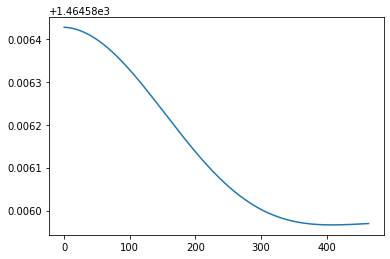

integral = tensor([[1.0000]])
sigma = 0.1291549665014884, lambda = 3.359818286283788e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 468 iterations


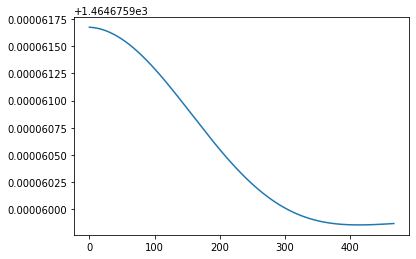

integral = tensor([[1.0000]])
sigma = 0.16681005372000587, lambda = 3.359818286283788e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 455 iterations


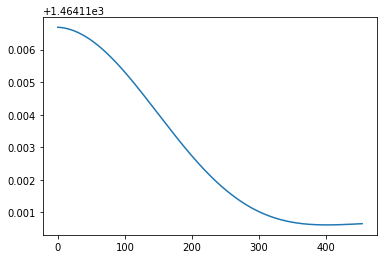

integral = tensor([[1.]])
sigma = 0.16681005372000587, lambda = 3.359818286283788e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 465 iterations


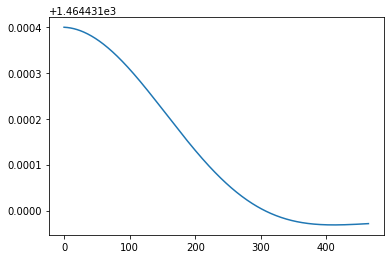

integral = tensor([[1.0000]])
sigma = 0.21544346900318834, lambda = 3.359818286283788e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 470 iterations


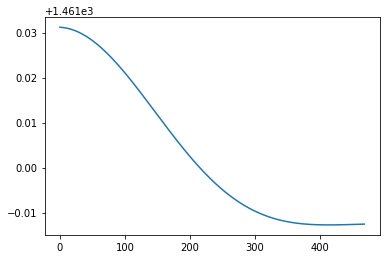

integral = tensor([[1.0000]])
sigma = 0.21544346900318834, lambda = 3.359818286283788e-15
 norm of the constraint : 2.0924281066140032e-12
Finished after 466 iterations


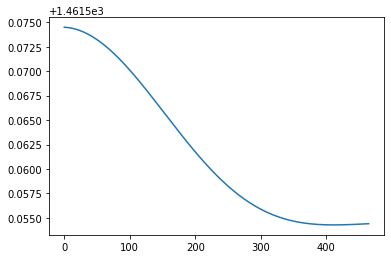

integral = tensor([[1.0000]])
sigma = 0.2782559402207124, lambda = 3.359818286283788e-15
 norm of the constraint : 5.6116775996327314e-12
Finished after 1690 iterations


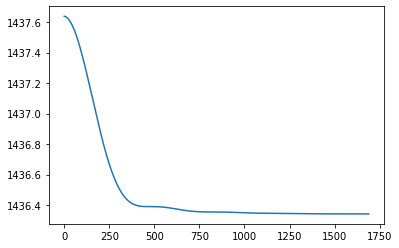

integral = tensor([[1.0000]])
sigma = 0.2782559402207124, lambda = 3.359818286283788e-15
 norm of the constraint : 5.621070907754123e-12
Finished after 880 iterations


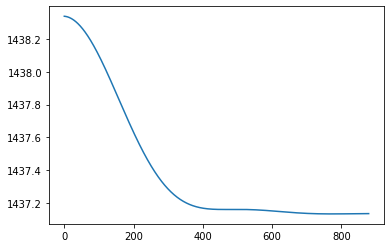

integral = tensor([[1.0000]])
sigma = 0.35938136638046275, lambda = 3.359818286283788e-15
 norm of the constraint : 7.17509895984332e-11
Finished after 3760 iterations


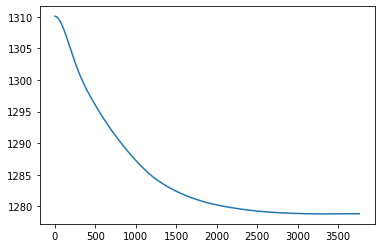

integral = tensor([[1.0000]])
sigma = 0.35938136638046275, lambda = 3.359818286283788e-15
 norm of the constraint : 7.187082912590732e-11
Finished after 6055 iterations


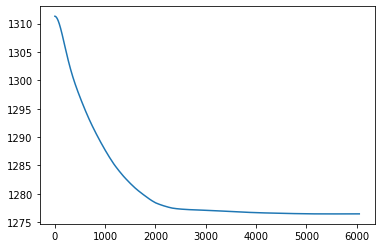

integral = tensor([[1.0000]])
sigma = 0.46415888336127786, lambda = 3.359818286283788e-15
 norm of the constraint : 9.112952035867178e-10
Finished after 5555 iterations


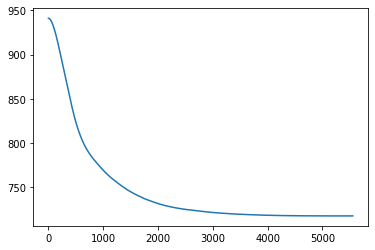

integral = tensor([[1.0000]])
sigma = 0.46415888336127786, lambda = 3.359818286283788e-15
 norm of the constraint : 9.128117128901206e-10
Finished after 7660 iterations


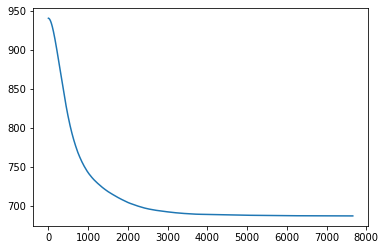

integral = tensor([[1.0000]])
sigma = 0.5994842503189409, lambda = 3.359818286283788e-15
 norm of the constraint : 1.1446707922222092e-08
Finished after 7760 iterations


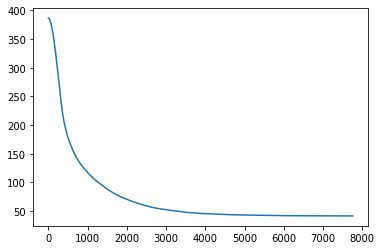

integral = tensor([[1.]])
sigma = 0.5994842503189409, lambda = 3.359818286283788e-15
 norm of the constraint : 1.1465641530237738e-08
Finished after 12685 iterations


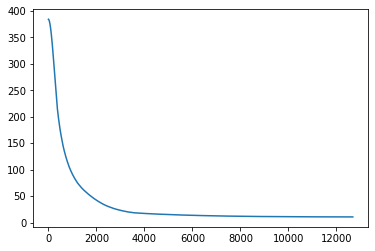

integral = tensor([[1.0000]])
sigma = 0.774263682681127, lambda = 3.359818286283788e-15
 norm of the constraint : 1.4118014899888868e-07
Finished after 11605 iterations


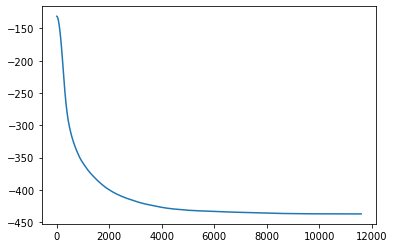

integral = tensor([[1.0000]])
sigma = 0.774263682681127, lambda = 3.359818286283788e-15
 norm of the constraint : 1.414113389207297e-07
Finished after 15045 iterations


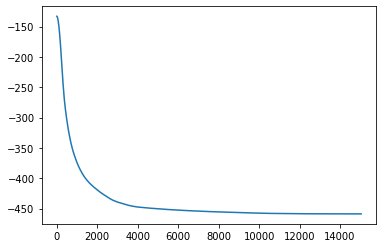

integral = tensor([[1.0000]])
sigma = 1.0, lambda = 3.359818286283788e-15
 norm of the constraint : 1.6900433121953011e-06
Finished after 13365 iterations


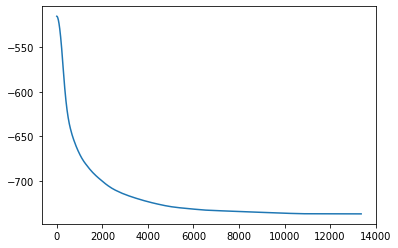

integral = tensor([[1.]])
sigma = 1.0, lambda = 3.359818286283788e-15
 norm of the constraint : 1.6927655088745877e-06
Finished after 20145 iterations


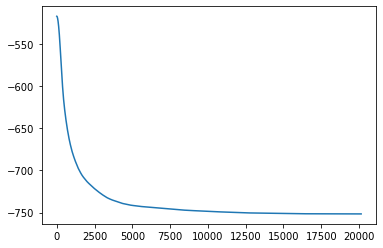

integral = tensor([[1.0000]])
sigma = 0.1, lambda = 1.1288378916846884e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 465 iterations


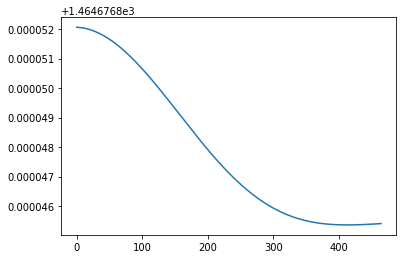

integral = tensor([[1.0000]])
sigma = 0.1, lambda = 1.1288378916846884e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 36 iterations


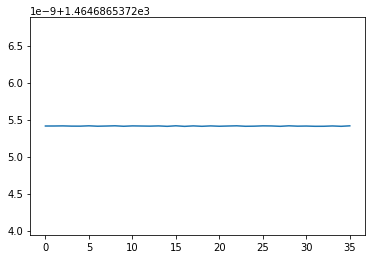

integral = tensor([[1.0000]])
sigma = 0.1291549665014884, lambda = 1.1288378916846884e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 465 iterations


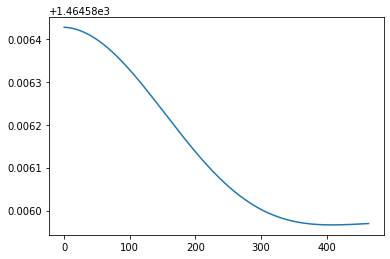

integral = tensor([[1.0000]])
sigma = 0.1291549665014884, lambda = 1.1288378916846884e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 467 iterations


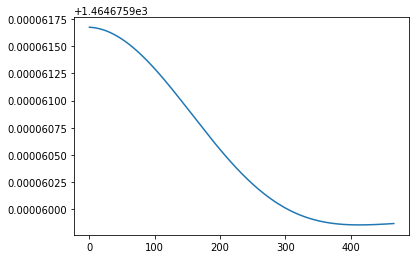

integral = tensor([[1.0000]])
sigma = 0.16681005372000587, lambda = 1.1288378916846884e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 455 iterations


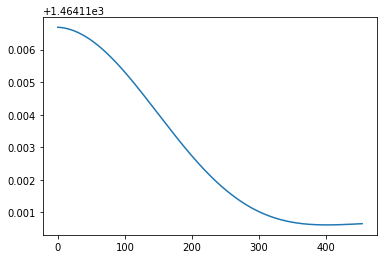

integral = tensor([[1.0000]])
sigma = 0.16681005372000587, lambda = 1.1288378916846884e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 465 iterations


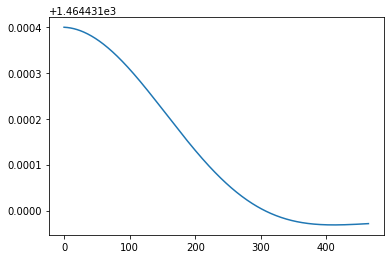

integral = tensor([[1.0000]])
sigma = 0.21544346900318834, lambda = 1.1288378916846884e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 470 iterations


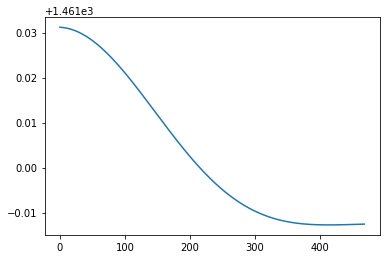

integral = tensor([[1.0000]])
sigma = 0.21544346900318834, lambda = 1.1288378916846884e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 466 iterations


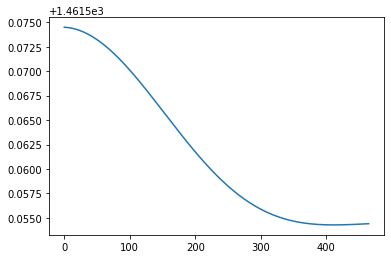

integral = tensor([[1.]])
sigma = 0.2782559402207124, lambda = 1.1288378916846884e-14
 norm of the constraint : 5.6116775996327314e-12
Finished after 1690 iterations


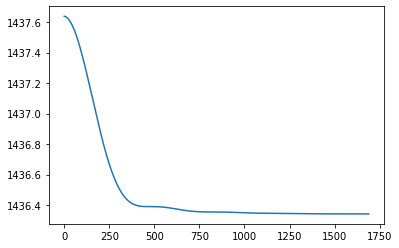

integral = tensor([[1.0000]])
sigma = 0.2782559402207124, lambda = 1.1288378916846884e-14
 norm of the constraint : 5.621070907754123e-12
Finished after 880 iterations


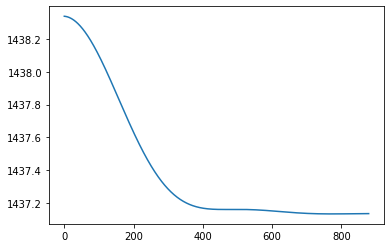

integral = tensor([[1.0000]])
sigma = 0.35938136638046275, lambda = 1.1288378916846884e-14
 norm of the constraint : 7.17509895984332e-11
Finished after 3760 iterations


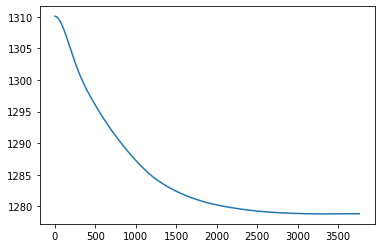

integral = tensor([[1.]])
sigma = 0.35938136638046275, lambda = 1.1288378916846884e-14
 norm of the constraint : 7.187082912590732e-11
Finished after 6055 iterations


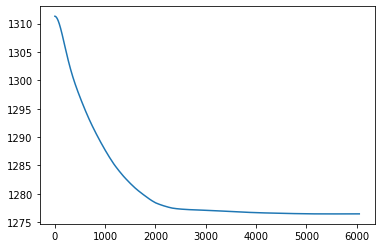

integral = tensor([[1.0000]])
sigma = 0.46415888336127786, lambda = 1.1288378916846884e-14
 norm of the constraint : 9.112952035867178e-10
Finished after 5555 iterations


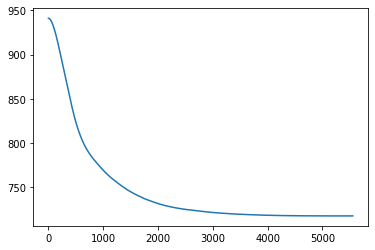

integral = tensor([[1.]])
sigma = 0.46415888336127786, lambda = 1.1288378916846884e-14
 norm of the constraint : 9.128117128901206e-10
Finished after 7660 iterations


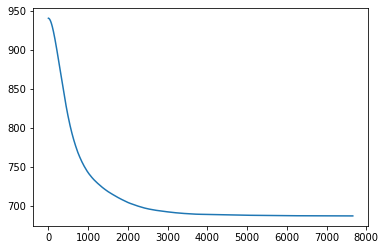

integral = tensor([[1.0000]])
sigma = 0.5994842503189409, lambda = 1.1288378916846884e-14
 norm of the constraint : 1.1446707922222092e-08
Finished after 7760 iterations


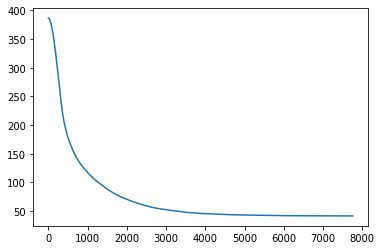

integral = tensor([[1.]])
sigma = 0.5994842503189409, lambda = 1.1288378916846884e-14
 norm of the constraint : 1.1465641530237738e-08
Finished after 12685 iterations


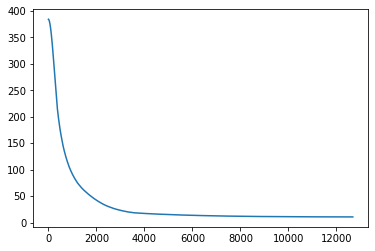

integral = tensor([[1.0000]])
sigma = 0.774263682681127, lambda = 1.1288378916846884e-14
 norm of the constraint : 1.4118014899888868e-07
Finished after 11605 iterations


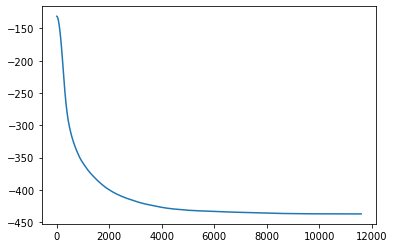

integral = tensor([[1.0000]])
sigma = 0.774263682681127, lambda = 1.1288378916846884e-14
 norm of the constraint : 1.414113389207297e-07
Finished after 15045 iterations


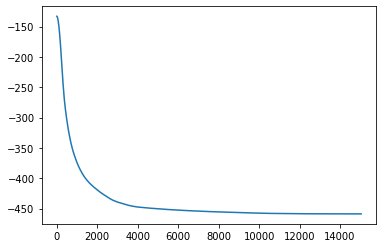

integral = tensor([[1.]])
sigma = 1.0, lambda = 1.1288378916846884e-14
 norm of the constraint : 1.6900433121953011e-06
Finished after 13365 iterations


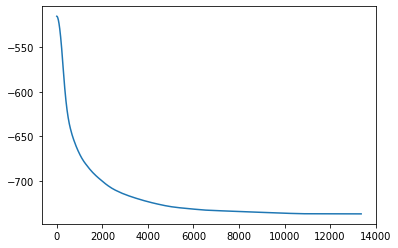

integral = tensor([[1.0000]])
sigma = 1.0, lambda = 1.1288378916846884e-14
 norm of the constraint : 1.6927655088745877e-06
Finished after 20145 iterations


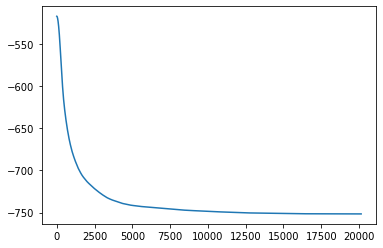

integral = tensor([[1.]])
sigma = 0.1, lambda = 3.7926901907322537e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 465 iterations


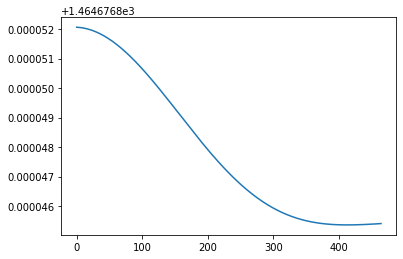

integral = tensor([[1.0000]])
sigma = 0.1, lambda = 3.7926901907322537e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 31 iterations


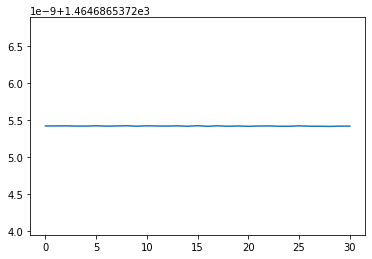

integral = tensor([[1.0000]])
sigma = 0.1291549665014884, lambda = 3.7926901907322537e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 465 iterations


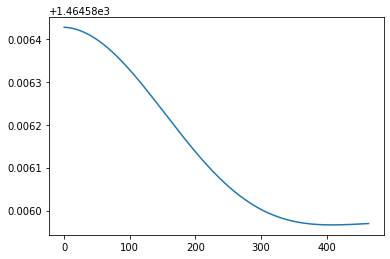

integral = tensor([[1.0000]])
sigma = 0.1291549665014884, lambda = 3.7926901907322537e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 468 iterations


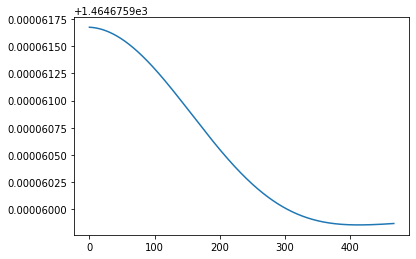

integral = tensor([[1.0000]])
sigma = 0.16681005372000587, lambda = 3.7926901907322537e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 455 iterations


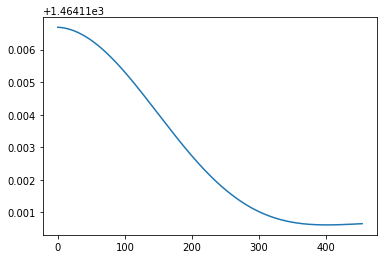

integral = tensor([[1.0000]])
sigma = 0.16681005372000587, lambda = 3.7926901907322537e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 465 iterations


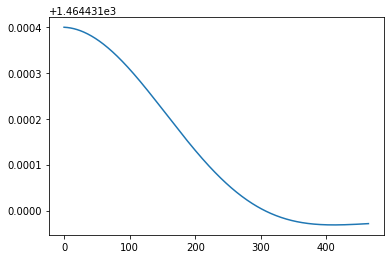

integral = tensor([[1.0000]])
sigma = 0.21544346900318834, lambda = 3.7926901907322537e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 470 iterations


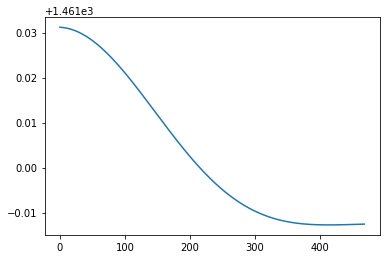

integral = tensor([[1.0000]])
sigma = 0.21544346900318834, lambda = 3.7926901907322537e-14
 norm of the constraint : 2.0924281066140032e-12
Finished after 466 iterations


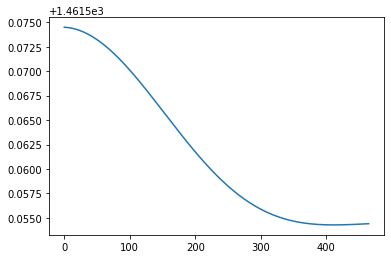

integral = tensor([[1.]])
sigma = 0.2782559402207124, lambda = 3.7926901907322537e-14
 norm of the constraint : 5.6116775996327314e-12
Finished after 1690 iterations


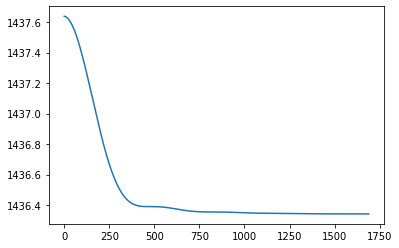

integral = tensor([[1.0000]])
sigma = 0.2782559402207124, lambda = 3.7926901907322537e-14
 norm of the constraint : 5.621070907754123e-12
Finished after 880 iterations


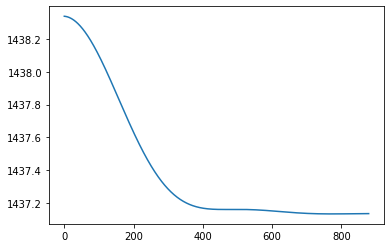

integral = tensor([[1.0000]])
sigma = 0.35938136638046275, lambda = 3.7926901907322537e-14
 norm of the constraint : 7.17509895984332e-11
Finished after 3760 iterations


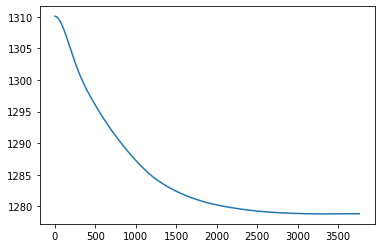

integral = tensor([[1.0000]])
sigma = 0.35938136638046275, lambda = 3.7926901907322537e-14
 norm of the constraint : 7.187082912590732e-11
Finished after 6055 iterations


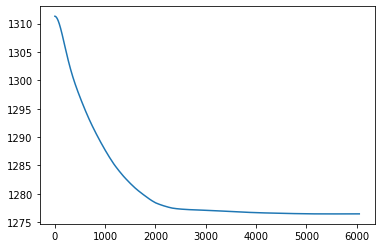

integral = tensor([[1.0000]])
sigma = 0.46415888336127786, lambda = 3.7926901907322537e-14
 norm of the constraint : 9.112952035867178e-10
Finished after 5555 iterations


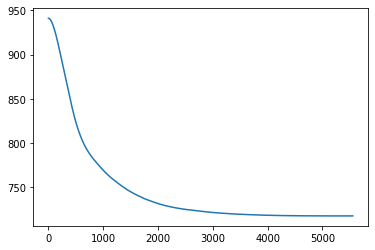

integral = tensor([[1.]])
sigma = 0.46415888336127786, lambda = 3.7926901907322537e-14
 norm of the constraint : 9.128117128901206e-10
Finished after 7660 iterations


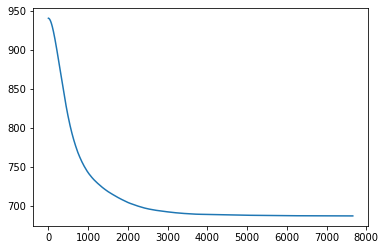

integral = tensor([[1.0000]])
sigma = 0.5994842503189409, lambda = 3.7926901907322537e-14
 norm of the constraint : 1.1446707922222092e-08


KeyboardInterrupt: 

In [5]:

parameters = {'sigma' : np.logspace(-1,0,10), 'la' : np.logspace(-15,-5,20),'Niter' : ['auto'],'mu_base' : [mu_base],'eta_base' : [eta_base]}
X = data_set
model = utils.NadarayaWatsonEstimator()
clf = GridSearchCV(model, parameters,cv = 2)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/nw_model_10D_{version}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

In [8]:
df = pd.DataFrame(clf_ingo)

NameError: name 'df' is not defined

{'Niter': 'auto', 'eta_base': 5, 'la': 1e-08, 'mu_base': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'sigma': 0.31622776601683794}
sigma = 0.31622776601683794, lambda = 1e-08
 norm of the constraint : 1.5542269604949684e-11
Finished after 880 iterations


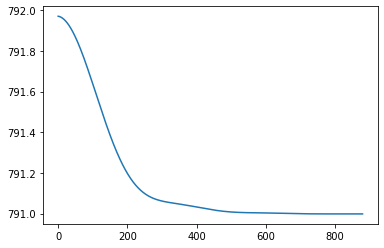

In [11]:
version = 1
filename = f'models/nw_model_10D_{version}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model  = utils.NadarayaWatsonEstimator(**params_best)
#model = utils.NadarayaWatsonEstimator(**{'sigma' : 0.1, 'la' : 0.01,'Niter' : 10000,'eta_base' : eta_base,'mu_base' : mu_base})
model.fit(data_set)

In [12]:
model.score(data_set)

integral = tensor([[1.]])


tensor(-3.2491)

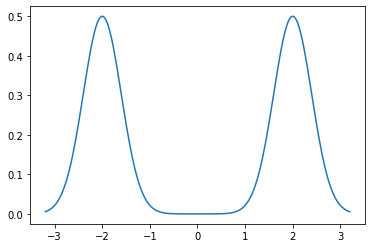

integral = tensor([[1.]])
integral = tensor([[1.]])
tensor(0)
tensor(3.8574e+08)
integral = tensor([[1.]])


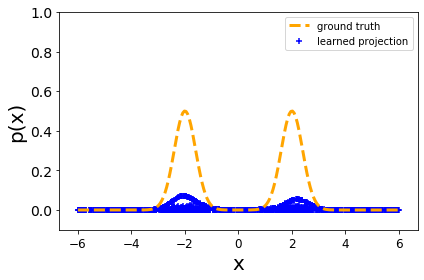

In [15]:
#xtest = torch.linspace(-,5,3000)
c,rad,ntest = 0,6,1000

xtest2 = gentest(ntest,c,rad)
xtest = torch.zeros((ntest//2,d))


xtest[:,0] = c + rad*(2*torch.rand(ntest//2) - 1)
ytest = model.predict(xtest)
ytest2 = model.predict(xtest2)
print((ytest < 0).sum())
print(ytest.sum()*(2*rad)**d/ntest)
ydata_set = model.predict(data_set)



xdata = data_set


xhaha = torch.linspace(-rad,rad,200)
yhaha = 0.5*(torch.exp(-(xhaha-r_data)**2/(2*sigma_data**2)) +torch.exp(-(xhaha+r_data)**2/(2*sigma_data**2)) )




#xtest = torch.load(pt_path+'xtest_linear0.pt')
#ytest = torch.load(pt_path+'ytest_linear0.pt')
#xdata = torch.load(pt_path+'xdataExperiments.pt')
#ydata_set = torch.load(pt_path+'ydata_linear0.pt')


#ytestref = density_fun(xtest)



fig = plt.figure()
plt.scatter(xtest[:,0],ytest[:],lw = 1.5,label='learned projection',zorder = -1,marker = '+',color = 'b')
plt.scatter(xtest2[:,0],ytest2[:],lw = 1.5,zorder = -1,marker = '+',color = 'b')
plt.plot(xhaha,yhaha,lw = 3,linestyle = 'dashed',label = 'ground truth',color = 'orange')
#plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
#plt.scatter(xdata,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.ylim(-0.1,1)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=100)
plt.show()

# GLMS 

In [ ]:
version = find_last_version(path = 'models/glm_model_1D',extension = 'pickle')

print(f'last version number : {version}')

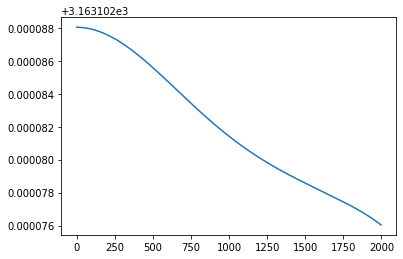

KeyboardInterrupt: 

In [11]:
parameters = {'sigma' : [1], 'la' : np.logspace(-8,0,20),'Niter' : [2000],'mu_base' : [mu_base],'eta_base' : [eta_base]}
X = data_set
model = utils.ExpoEstimator()
clf = GridSearchCV(model, parameters,cv = 5)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/glm_model_1D_{version}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

In [ ]:
version = 1
filename = f'models/glm_model_1D_{version}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model = utils.ExpoEstimator(**params_best)
model.fit(data_set)

In [ ]:
c,r,ntest = 0,10,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = model.predict(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set = model.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()